# Introduction

Predicting housing Prices: Kaggle Competition. I have applied what I learned in the Machine Learning courses includin Kaggle's.

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#load datasets
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

The data is already split and the test set does not contain the target variable **SalePrice**. This is a perfect simulation of a real world situation.  

In [5]:
home_data = train_data.copy()
home_data.shape

(1460, 81)

### Exploratory Data Analysis (EDA)

In [7]:
home_data.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Price Distribution

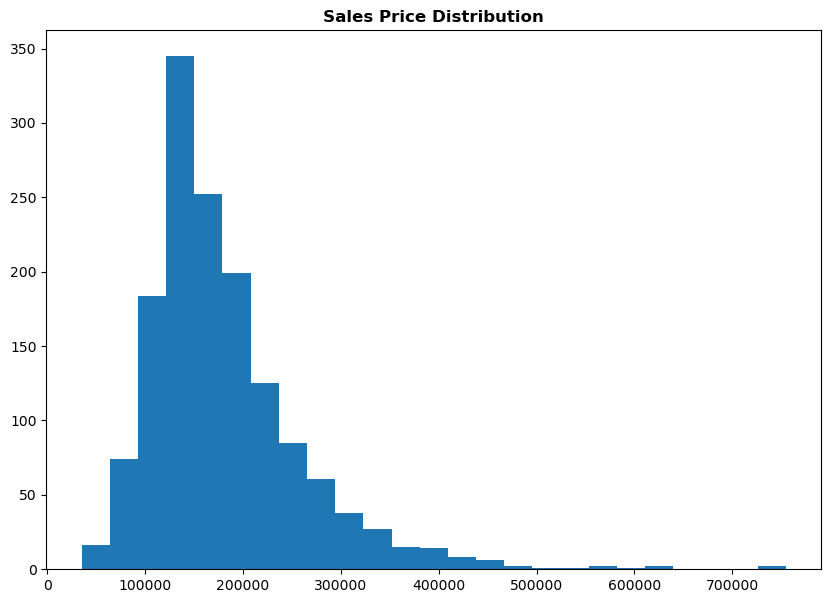

In [9]:
#Saleprice distribution
plt.figure(figsize = (10, 7))
plt.hist(home_data["SalePrice"], bins = 25)
plt.title("Sales Price Distribution", weight = "bold", fontsize = 12)
plt.show()

### Distribution of Numeric Features

In [11]:
df_numeric = home_data.select_dtypes(exclude="object")
df_numeric.drop(["Id"], axis = 1, inplace = True)
df_numeric.shape

(1460, 37)

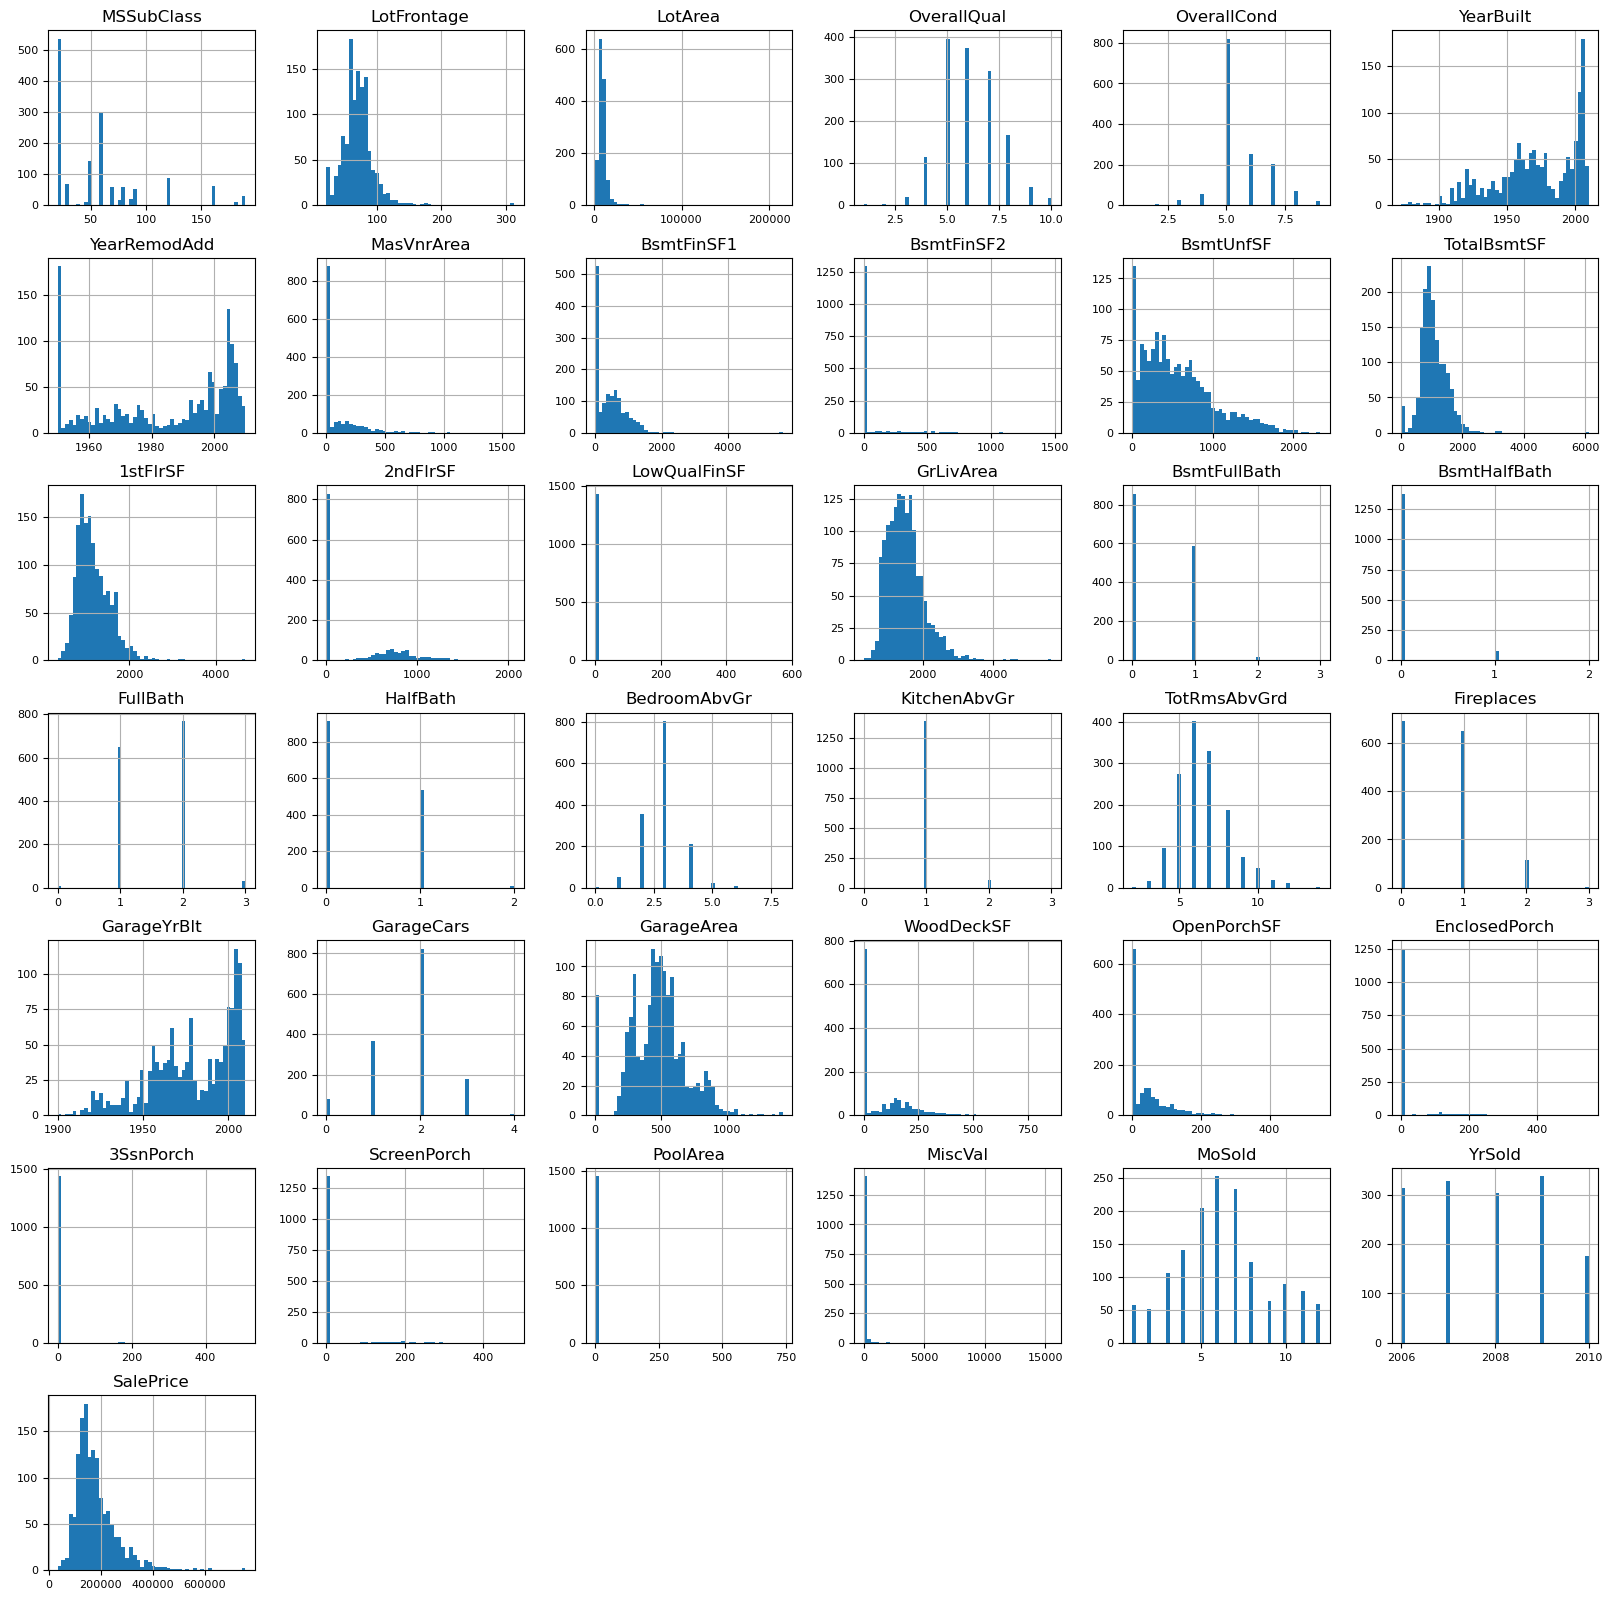

In [12]:
df_numeric.hist(figsize=(20, 20), bins=50, xlabelsize=8, ylabelsize=8);

### Correlation Analysis

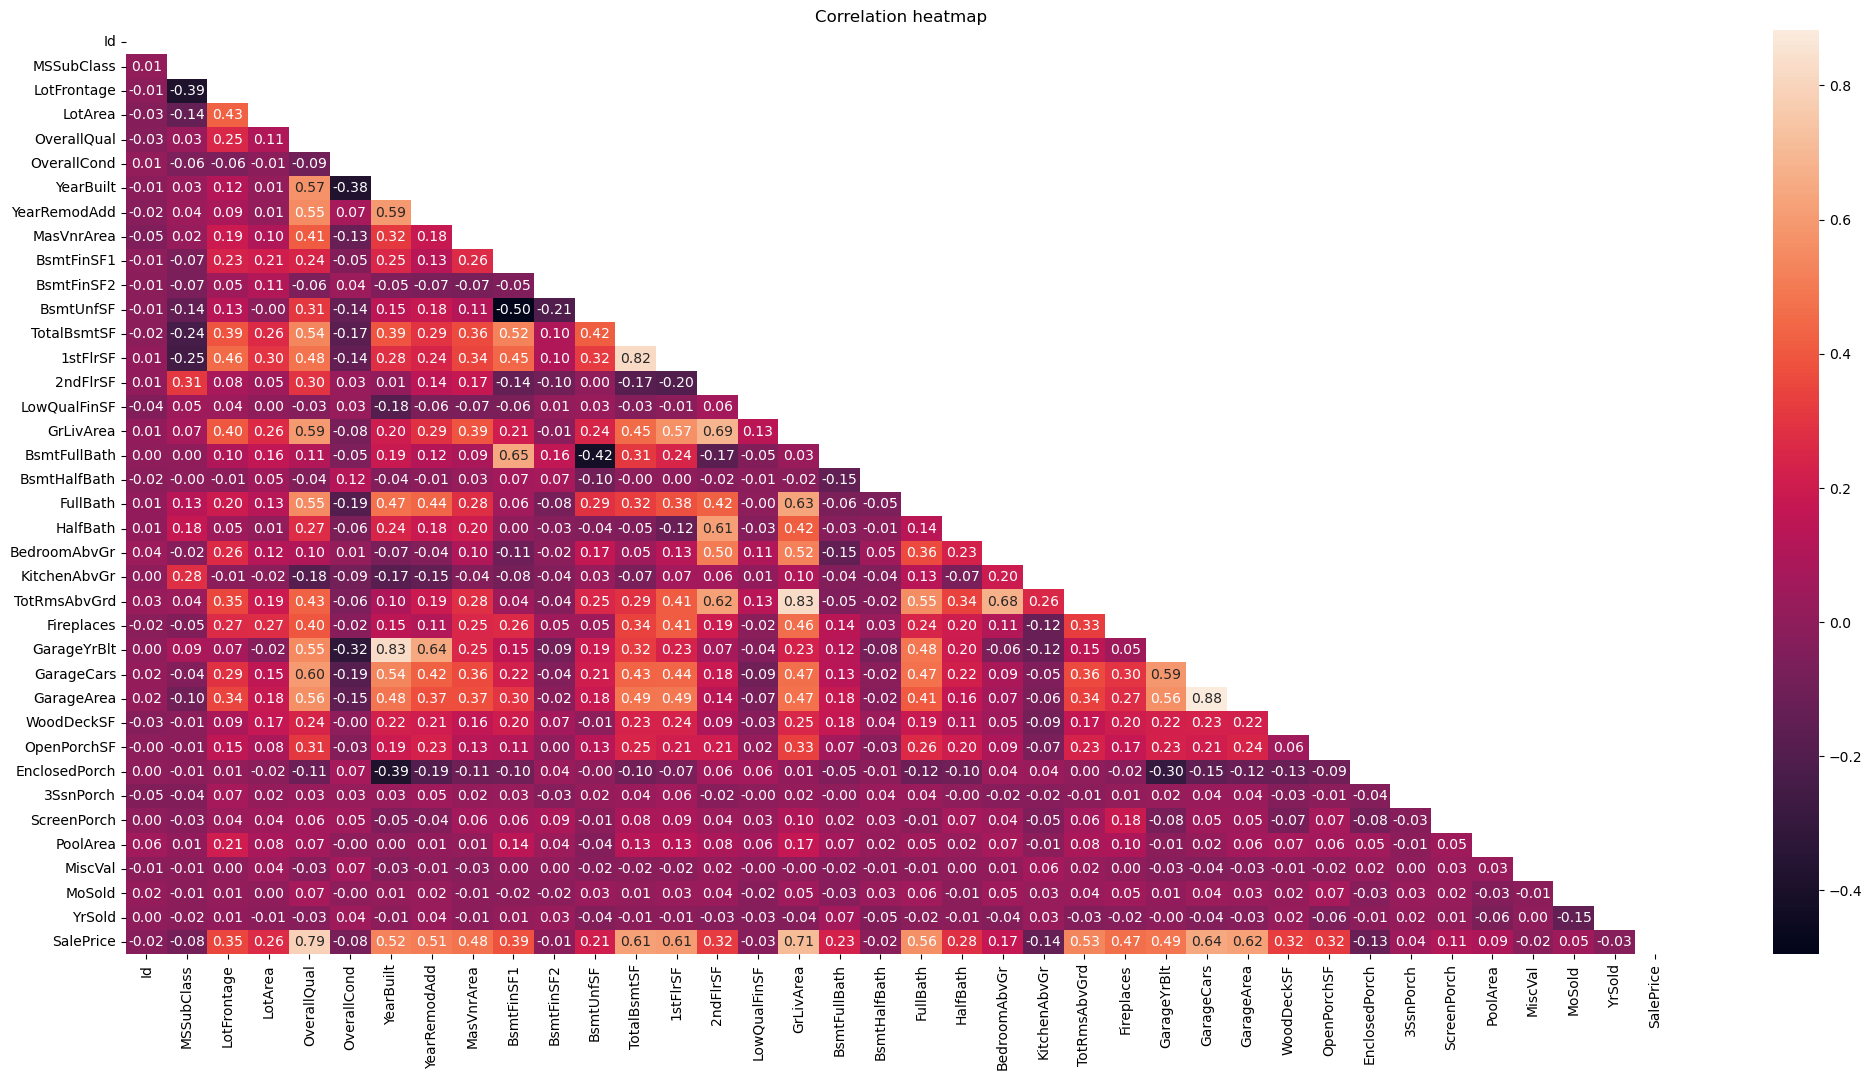

In [14]:
fig, ax = plt.subplots(figsize=(25,12))
df_numeric = home_data.select_dtypes(exclude="object") 
corr_matrix = df_numeric.corr()

mask = np.triu(np.ones_like(corr_matrix, dtype = bool))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", ax=ax, mask = mask)
plt.title("Correlation heatmap")
plt.show()

We see there is some correlation between features. For example garage area has a 0.89 correlation with garage cars. I may have to merge such features later.

#### Features with over 0.5 (absolute value) correlation with sales price

In [131]:
features = df_numeric.columns[: 36]
correlation = df_numeric[features].corrwith(df_numeric["SalePrice"])

print(correlation[(correlation >= 0.5) | (correlation <= -0.5)])

OverallQual     0.790982
YearBuilt       0.522897
YearRemodAdd    0.507101
TotalBsmtSF     0.613581
1stFlrSF        0.605852
GrLivArea       0.708624
FullBath        0.560664
TotRmsAbvGrd    0.533723
GarageCars      0.640409
GarageArea      0.623431
dtype: float64


## Visualize the Relationship between House Price and other Features

In [19]:
df_numeric.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

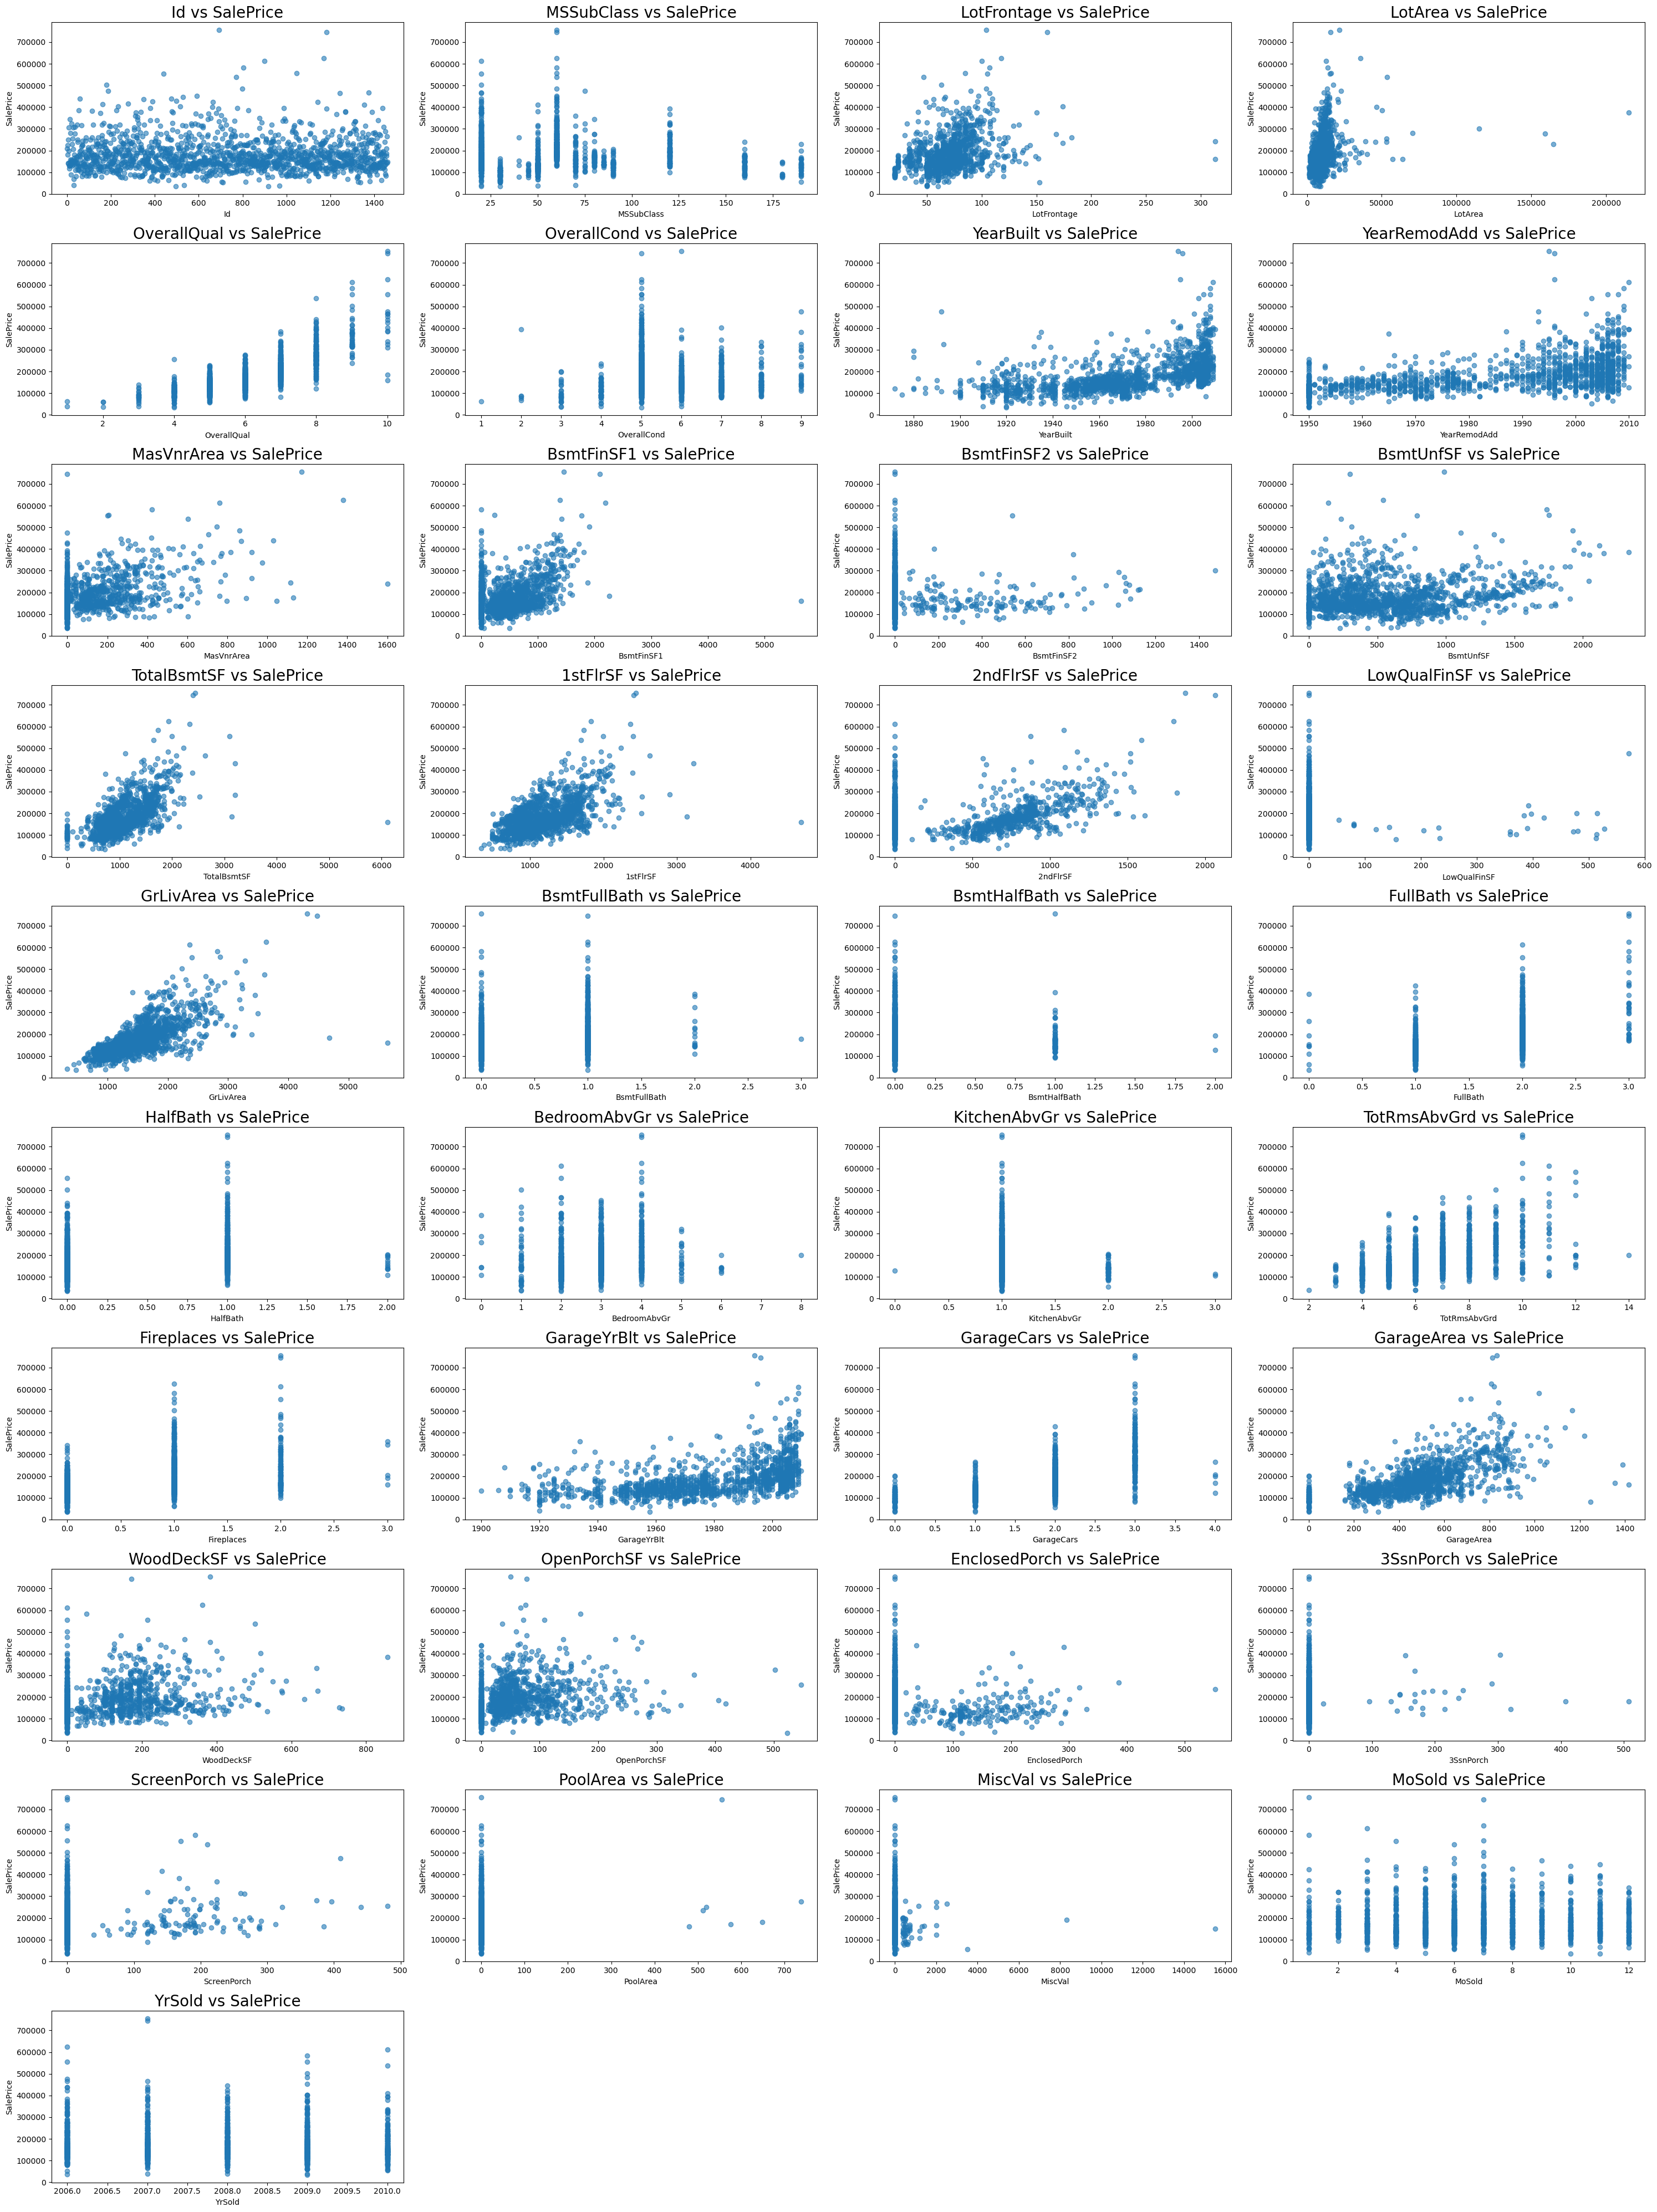

In [20]:
#house price with predictive features individually
target_col = df_numeric.columns[-1]
feature_cols = df_numeric.columns[:-1]

n_features = len(feature_cols)
n_cols = 4  # 4 plots per row, adjust as needed
n_rows = (n_features + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(30, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(feature_cols):
    axes[i].scatter(df_numeric[col], df_numeric[target_col], alpha=0.6)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel(target_col)
    axes[i].set_title(f'{col} vs {target_col}', fontsize = 20)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


#### Visualize the relationship including categorical variables

In [22]:
# function to visualize the relationship between the target variable and the predictive features  
def visualization(df, x, y, hue, palette):
    """
    plots a sns scatterplot to visualize the relationship between X, Y and two additional cols
    df = pd.DataFrame
    x = df col to be plotted on the X axis
    y = df col to be plotted on the Y axis
    hue = df col to be used as hue in sns.scatterplot()
    """
    plt.figure(figsize = (6, 4))
    fig = sns.scatterplot(data = df, x = x, y = y, hue = hue, legend="full", palette = palette)
    fig.spines['top'].set_visible(False)
    fig.spines['right'].set_visible(False)
    plt.title(f"Effect of {x} and {hue} on {y}", weight = "bold", fontsize = 12)
    plt.ylabel(y, fontsize = 11)
    plt.xlabel(x, fontsize = 11)
    plt.show()

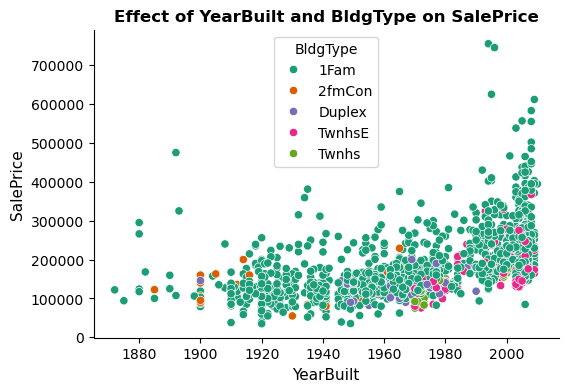

In [23]:
visualization(home_data, "YearBuilt", "SalePrice", "BldgType", "Dark2")

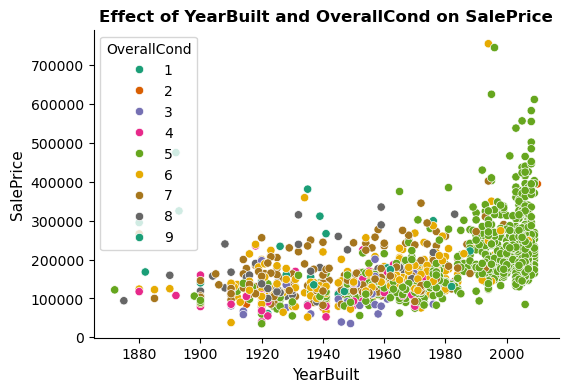

In [24]:
visualization(home_data, "YearBuilt", "SalePrice", "OverallCond", "Dark2")

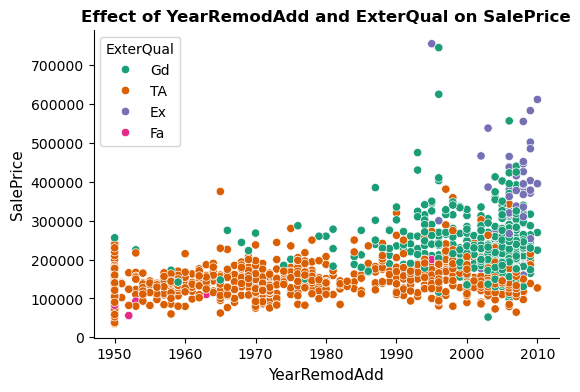

In [25]:
visualization(home_data, "YearRemodAdd", "SalePrice", "ExterQual", "Dark2")

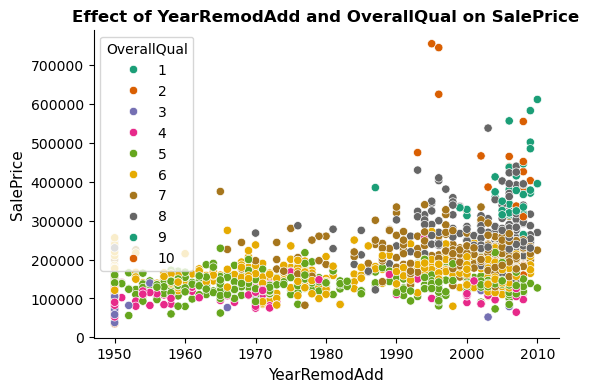

In [26]:
visualization(home_data, "YearRemodAdd", "SalePrice", "OverallQual", "Dark2")

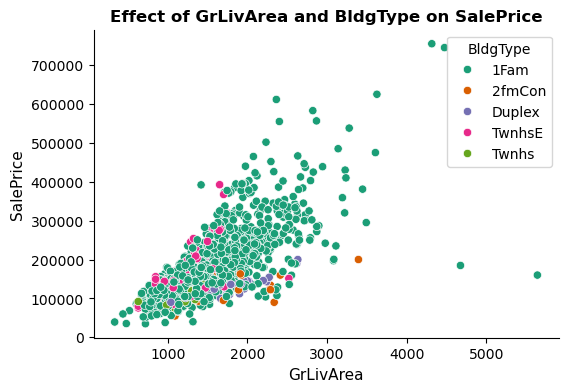

In [27]:
visualization(home_data, "GrLivArea", "SalePrice", "BldgType", "Dark2")

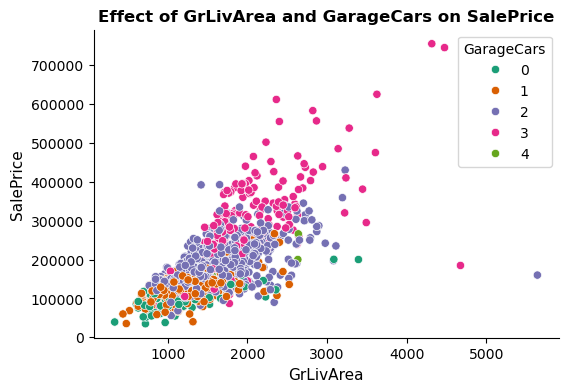

In [28]:
visualization(home_data, "GrLivArea", "SalePrice", "GarageCars", "Dark2")

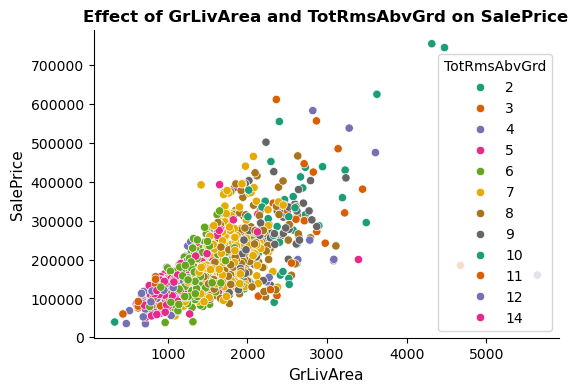

In [29]:
visualization(home_data, "GrLivArea", "SalePrice", "TotRmsAbvGrd", "Dark2")

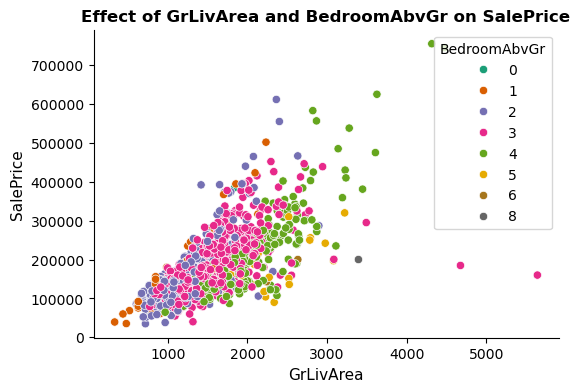

In [30]:
visualization(home_data, "GrLivArea", "SalePrice", "BedroomAbvGr", "Dark2")

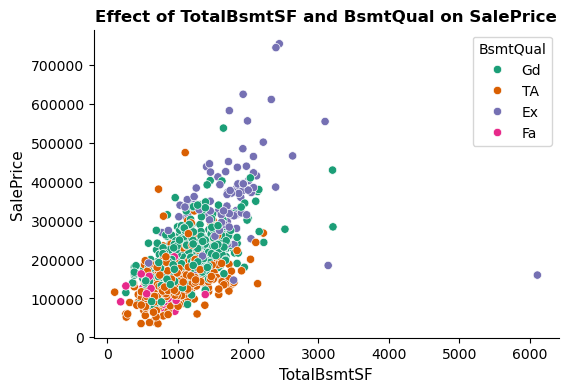

In [31]:
visualization(home_data, "TotalBsmtSF", "SalePrice", "BsmtQual", "Dark2")

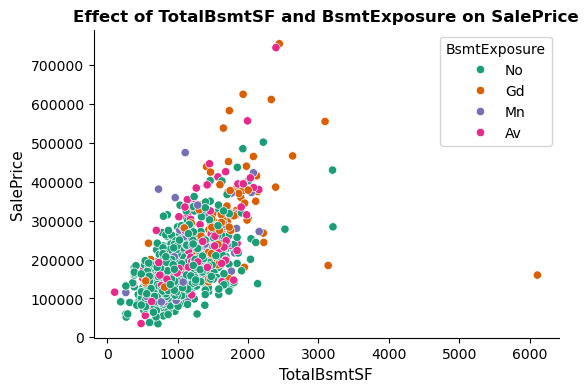

In [32]:
visualization(home_data, "TotalBsmtSF", "SalePrice", "BsmtExposure", "Dark2")

## Handling Missing Values

In [34]:
#helper function to check for missing values 
def check_nulls(df):
    missing = df.isnull().sum().sort_values(ascending = False)
    return missing[missing > 0]

In [35]:
check_nulls(home_data)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64

In [36]:
#make a copy of the dataset to work with
df = home_data.copy()

#### Categorical variables

In [38]:
categorical_cols = df.select_dtypes(exclude = ("int64", "float64"))

categorical_cols.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [39]:
check_nulls(categorical_cols)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
GarageType        81
GarageCond        81
GarageQual        81
GarageFinish      81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtQual          37
BsmtCond          37
Electrical         1
dtype: int64

### Pool features

PoolQC has the highest missing values in my categorical columns. There are only 2 pool related features. The 1.4k missing values make sense because in reality, not many houses have a pool. So I have assumed the null values means the houses do not have a pool. Also from the description, NA means "No Pool". A quick check shows that we actually have (nan, 'Ex', 'Fa', 'Gd') for pool quality. Now I can confidently replace nan with "no pool". 

In [41]:
# pool related features
pool = df[["PoolQC", "PoolArea"]]
pool.isnull().sum()

PoolQC      1453
PoolArea       0
dtype: int64

In [42]:
pool.PoolQC.unique()

array([nan, 'Ex', 'Fa', 'Gd'], dtype=object)

In [43]:
#replace nan with 'no pool' in the main dataframe
df["PoolQC"] = df["PoolQC"].replace(np.nan, "None")

#### Masonry veneer There are only two variables for this. Data description indicates that MasVnrType has BrkFace', 'Stone', 'BrkCmn' or none. Therefore I fill nulls with "None". Masonry veneer area in sq feet has only 23 missing values and we can see they align with where there is no masonry vaneer type. I fill this with 0.00. None


In [45]:
df[["MasVnrArea", "MasVnrType"]].isnull().sum()

MasVnrArea      8
MasVnrType    872
dtype: int64

In [46]:
sliced_df = df.iloc[:, 24:58]
sliced_df[sliced_df["MasVnrArea"].isna()]

,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,...,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu
234,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,...,0,2,1,4,1,Gd,8,Typ,2,TA
529,Stone,NaN,NaN,Gd,TA,PConc,TA,TA,No,Rec,...,0,3,0,4,2,TA,9,Maj1,2,TA
650,CmentBd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,Unf,...,0,2,1,3,1,Gd,7,Typ,0,NaN
936,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,...,0,2,0,2,1,Gd,5,Typ,0,NaN
973,CmentBd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,Unf,...,0,2,0,3,1,Gd,6,Typ,0,NaN
977,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,...,0,1,1,1,1,Gd,4,Typ,0,NaN
1243,VinylSd,NaN,NaN,Ex,TA,PConc,Ex,Gd,Gd,GLQ,...,0,2,1,2,1,Ex,7,Typ,1,Gd
1278,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,...,0,2,1,3,1,Gd,7,Typ,1,Gd


In [47]:
df["MasVnrArea"] = df["MasVnrArea"].fillna(0.00)
df["MasVnrType"] = df["MasVnrType"].fillna("None")

### Fireplace features

This shows the number of fireplaces and their quality, which ranges from excellent to poor and NA means "no fireplace. So, the null values in FireplaceQu means no fireplace.

In [49]:
df[['Fireplaces', 'FireplaceQu']].isnull().sum()

Fireplaces       0
FireplaceQu    690
dtype: int64

In [50]:
# fill the missing values with "no fireplace"

df["FireplaceQu"] = df["FireplaceQu"].fillna("None")

### Garage features

There are 7 garage related features and 5 of them have the same missing values. I am assuming this is because the houses do not have an actual garage and fill those with "no garage". GarageCars and GarageArea are numeric with only 1 missing value.  

In [53]:
garage = df[['GarageQual', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageCond']]

garage.isnull().sum()

GarageQual      81
GarageType      81
GarageYrBlt     81
GarageFinish    81
GarageCars       0
GarageArea       0
GarageCond      81
dtype: int64

In [54]:
# fill missing values on garage variables 
df[['GarageQual', 'GarageType', 'GarageFinish', 'GarageCond']] = df[[
    'GarageQual', 'GarageType', 'GarageFinish', 'GarageCond']].replace(np.nan, "None")

In [55]:
df[["GarageYrBlt", 'GarageCars', 'GarageArea']] = df[["GarageYrBlt", 'GarageCars', 'GarageArea']].fillna(0000)

### Basement features

There are many basement related variables. We have almost the same number of missing values for 5 basement variables and according to documentation, NA in these variables indicate "the house has no basement". I fill these with "no basement".

In [57]:
basement = df[['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 
               'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']]
basement.isnull().sum().sort_values(ascending = False)

BsmtExposure    38
BsmtFinType2    38
BsmtQual        37
BsmtCond        37
BsmtFinType1    37
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
BsmtFullBath     0
BsmtHalfBath     0
dtype: int64

In [58]:
df[['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']] = df[[
    'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']].fillna("None")

In [59]:
df[["BsmtFullBath", "BsmtHalfBath", "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF"]] = df[[
    "BsmtFullBath", "BsmtHalfBath", "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF"]].fillna(0.00) 

### Kitchen features

In [61]:
sliced_df[sliced_df["KitchenQual"].isna()]

,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,...,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu


In [62]:
df["KitchenQual"] = df["KitchenQual"].fillna(df["KitchenQual"].mode()[0])

#### check for missing values again

In [64]:
check_nulls(df)

MiscFeature    1406
Alley          1369
Fence          1179
LotFrontage     259
Electrical        1
dtype: int64

for miscellaneous feature not covered in other categories, alley, and fence NA indicates "none". I am gonna assume that this also applies to lotfrontage because in this dataset, almost all missing values mean that the house does not have that particular feature.

In [66]:
df[["MiscFeature", "Alley", "Fence"]] = df[["MiscFeature", "Alley", "Fence"]].fillna("None")

In [67]:
df["LotFrontage"] = df["LotFrontage"].fillna(0.00)

## Encoding Categorical Variables with Ordinal Relationship

Ordinal variables with similar entries where EX-excellent, Gd-good, TA-average, Fa-fair, Po-poor and NA-none: PoolQC, FireplaceQu, GarageQual, BsmtQual, KitchenQual, ExterQual, HeatingQC and other quality features. I have used the same encoding for all quality related variables.   

In [69]:
#create a dictionary to use for encoding 
encoding_dict = {"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1, "None": 0 }

In [70]:
#encode quality related columns
cols_to_encode = ["ExterCond", "ExterQual", "BsmtQual", "BsmtCond", "HeatingQC", "KitchenQual", 
                  "FireplaceQu", "GarageQual", "GarageCond", "PoolQC"]
encoded_cols = df[cols_to_encode].map(encoding_dict.get)

#replace original cols in df with the encoded cols
df[cols_to_encode] = encoded_cols

In [71]:
df[cols_to_encode].head()

,ExterCond,ExterQual,BsmtQual,BsmtCond,HeatingQC,KitchenQual,FireplaceQu,GarageQual,GarageCond,PoolQC
0,3,4,4,3,5,4,0,3,3,0
1,3,3,4,3,5,3,3,3,3,0
2,3,4,4,3,5,4,3,3,3,0
3,3,3,3,4,4,4,4,3,3,0
4,3,4,4,3,5,4,3,3,3,0


Other features that may have ordinal relationships

In [73]:
basement_encoding = {"GLQ": 6, "ALQ": 5, "BLQ": 4, "Rec": 3, "LwQ": 2, "Unf": 1, 	"None": 0}
basement_cols = ["BsmtFinType1", "BsmtFinType2"]

basement_encoded = df[basement_cols].map(basement_encoding.get)
df[basement_cols] = basement_encoded

# encode exposure directly
exposure_mapping = {"None": 0, "No": 1, "Mn": 2, "Av":3, "Gd": 4}
df["BsmtExposure"] = df["BsmtExposure"].map(exposure_mapping.get)

In [74]:
# encode central air conditioning irectly
air_mapping = {"N": 0, "Y": 1}
df['CentralAir'] = df['CentralAir'].map(air_mapping.get)

In [75]:
df.to_csv("cleaned_data.csv", index = False)

**Next is feature engineering. Check the notebook of feature engineering!**